# Character-Level Recurrent Neural Network (RNN)
__[Reference Link from stanford university](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)__<br>
__[Reference Link from Amazon](https://aws.amazon.com/what-is/recurrent-neural-network/)__<br>
__[Reference Link from IBM](https://www.ibm.com/topics/recurrent-neural-networks/)__<br>
__[Reference Link from PyTorch](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)__<br>

1. Input: Sequential data (words, sentences, or time-series data)
2. Output: Sequential data (words, sentences, or time-series data)
3. Can be used to language translation, natural language processing (nlp), speech recognition, and image captioning, etc.

In [206]:
# Example of Vanilla RNN
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.scaler.com/topics/images/unfolding-recurrent-neural-network.webp", width=600, height=600)

## 0. Prepare data
Classifying Names with a Character-Level RNN

In [207]:
# Download and save data
import os
from pathlib import Path
import requests
import shutil

DATA_ZIP = "data.zip"
data_path = os.path.join('data', 'names')
DATA_PATH = Path(data_path)
data_zip_file = os.path.join("data", DATA_ZIP)
if not DATA_PATH.exists():
    DATA_PATH.mkdir(parents=True, exist_ok=True)
    print("Downloading " + DATA_ZIP)
    request = requests.get("https://download.pytorch.org/tutorial/" + DATA_ZIP)
    with open(data_zip_file, "wb") as f:
        f.write(request.content)

    print("Unzip " + DATA_ZIP)
    shutil.unpack_archive(data_zip_file, ".")

print("Testing data:")
print(os.listdir(data_path))

Testing data:
['Arabic.txt', 'Chinese.txt', 'Czech.txt', 'Dutch.txt', 'English.txt', 'French.txt', 'German.txt', 'Greek.txt', 'Irish.txt', 'Italian.txt', 'Japanese.txt', 'Korean.txt', 'Polish.txt', 'Portuguese.txt', 'Russian.txt', 'Scottish.txt', 'Spanish.txt', 'Vietnamese.txt']


In [208]:
# Convert to python unicode
from unidecode import unidecode
import glob
import string

category_lines = {}
all_categories = []

import unicodedata
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in glob.glob(os.path.join(data_path, '*.txt')):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [209]:
# Show sample data
import pandas as pd
datalines = []
dataframe = {}
samples = []
print(f"Total categories: {n_categories}")
for item in all_categories:
    datalines.append(len(category_lines[item]))
    samples.append(category_lines[item][:5])
dataframe["Category"] = all_categories
dataframe["Number"] = datalines
dataframe["Sample"] = samples
pd.DataFrame(dataframe)

Total categories: 18


,Category,Number,Sample
0,Arabic,2000,"[Khoury, Nahas, Daher, Gerges, Nazari]"
1,Chinese,268,"[Ang, Au-Yong, Bai, Ban, Bao]"
2,Czech,519,"[Abl, Adsit, Ajdrna, Alt, Antonowitsch]"
3,Dutch,297,"[Aalsburg, Aalst, Aarle, Achteren, Achthoven]"
4,English,3668,"[Abbas, Abbey, Abbott, Abdi, Abel]"
5,French,277,"[Abel, Abraham, Adam, Albert, Allard]"
6,German,724,"[Abbing, Abel, Abeln, Abt, Achilles]"
7,Greek,203,"[Adamidis, Adamou, Agelakos, Akrivopoulos, Ale..."
8,Irish,232,"[Adam, Ahearn, Aodh, Aodha, Aonghuis]"
9,Italian,709,"[Abandonato, Abatangelo, Abatantuono, Abate, A..."


In [210]:
# Data to Tensor
import torch
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters)

letterIdx = {}
for idx, letter in enumerate(all_letters):
    letterIdx[letter] = idx

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for idx, letter in enumerate(line):
        tensor[idx][0][letterIdx[letter]] = 1

    return tensor
test = lineToTensor("Test")
print(test)
print(test.shape)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0

## 1. Create RNN Model

In [211]:
import torch.nn as nn
import torch.nn.functional as F

class RNN_MODEL(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn_model = RNN_MODEL(n_letters, n_hidden, n_categories)

In [212]:
# test the model
hidden = rnn_model0.initHidden()

output, next_hidden = rnn_model0(test, hidden)
print(output.shape, next_hidden.shape)

torch.Size([4, 1, 18]) torch.Size([4, 1, 128])


In [213]:
import random

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

catIdx = {}
for idx, cat in enumerate(all_categories):
    catIdx[cat] = idx

def randomChoice(array):
    return array[random.randint(0, len(array) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([catIdx[category]], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

print(randomTrainingExample())

('Italian', 'Pontecorvo', tensor([9]), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

**Each loop of training will:**<br> 
* Create input and target tensors<br>
* Create a zeroed initial hidden state<br>
* Read each letter in and<br>
* Keep hidden state for next letter<br>
* Compare final output to target<br>
* Back-propagate<br>
* Return the output and loss<br>

In [214]:
# Loss function
loss_fn = nn.NLLLoss()

# Train step
learning_rate = 0.005 

# each train step train one line
def train_step(category_tensor, line_tensor, model):
    hidden = model.initHidden()

    model.zero_grad()

    # each character in this line
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)

    loss = loss_fn(output, category_tensor)
    loss.backward()

    # Update gradient 
    for p in model.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [215]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def train(model, current_loss, all_losses):
    for iter in range(1, n_iters + 1):
        category, line, category_tensor, line_tensor = randomTrainingExample()
        output, loss = train_step(category_tensor, line_tensor, model)
        current_loss += loss
    
        # Print ``iter`` number, loss, name and guess
        if iter % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
    
        # Add current loss avg to list of losses
        if iter % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0

train(rnn_model, current_loss, all_losses)

5000 5% (0m 12s) 1.6062 Atalikov / Greek ✗ (Russian)
10000 10% (0m 26s) 2.5815 Andres / Portuguese ✗ (German)
15000 15% (0m 38s) 1.3925 Arena / Spanish ✓
20000 20% (0m 52s) 0.3553 Tieu / Vietnamese ✓
25000 25% (1m 5s) 0.7899 Sowka / Polish ✓
30000 30% (1m 17s) 0.8073 Worner / German ✓
35000 35% (1m 31s) 0.4891 Yee / Chinese ✓
40000 40% (1m 43s) 0.2092 Shibukji / Japanese ✓
45000 45% (1m 56s) 1.0862 Maria / Portuguese ✓
50000 50% (2m 9s) 0.0380 Averchev / Russian ✓
55000 55% (2m 22s) 1.2894 Boden / English ✓
60000 60% (2m 35s) 3.0026 Seto / Spanish ✗ (Chinese)
65000 65% (2m 49s) 1.2155 Finn / Irish ✓
70000 70% (3m 4s) 0.5887 Miller / Scottish ✓
75000 75% (3m 17s) 0.5369 Dao / Vietnamese ✓
80000 80% (3m 30s) 0.7662 Le / Korean ✗ (Vietnamese)
85000 85% (3m 43s) 0.2542 Jeong / Korean ✓
90000 90% (3m 56s) 0.0465 Muraguchi / Japanese ✓
95000 95% (4m 9s) 0.1867 Soares / Portuguese ✓
100000 100% (4m 22s) 0.4952 Koza / Czech ✓


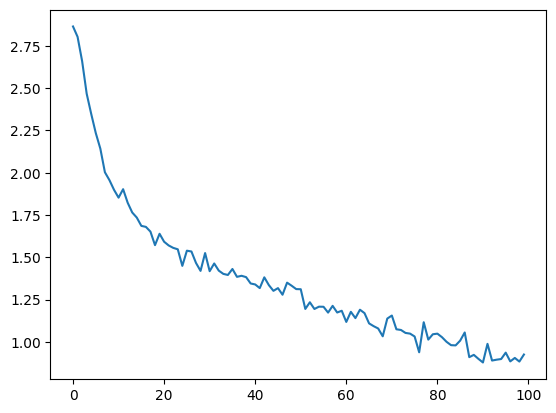

In [216]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

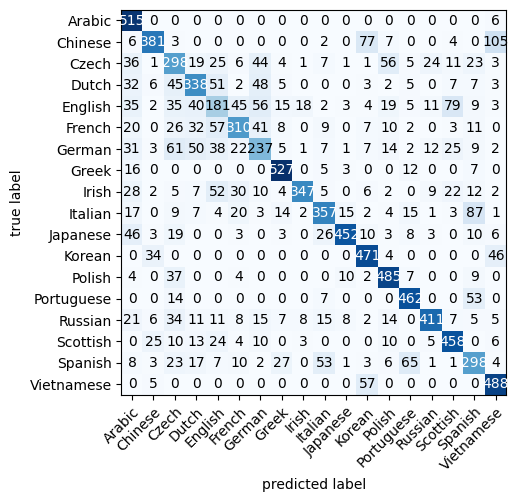

In [217]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting.plot_confusion_matrix import plot_confusion_matrix

n_confusion = 10000

def evaluate(line_tensor, model):
    hidden = model.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)
    return output

y_pred = []
y_true = []
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor, rnn_model)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    y_pred.append(guess_i)
    y_true.append(category_i)

y_pred_tensor = torch.Tensor(y_pred)
y_true_tensor = torch.Tensor(y_true)
confmat = ConfusionMatrix(num_classes=len(all_categories), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=y_true_tensor)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=all_categories,
    figsize=(8,5)
)

In [218]:
# Train more times
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

start = time.time()

# Train more
train(rnn_model, current_loss, all_losses)

5000 5% (0m 13s) 0.2208 Mitsui / Japanese ✓
10000 10% (0m 26s) 0.1365 Milano / Italian ✓
15000 15% (0m 39s) 0.1650 Choi / Korean ✓
20000 20% (0m 51s) 0.4486 Pilkington / English ✓
25000 25% (1m 4s) 0.1872 Gulamov / Russian ✓
30000 30% (1m 18s) 1.8440 Stedronsky / Russian ✗ (Czech)
35000 35% (1m 30s) 0.6411 Dunajski / Polish ✓
40000 40% (1m 41s) 0.2262 Baggi / Italian ✓
45000 45% (1m 52s) 1.4528 Pae / French ✗ (Korean)
50000 50% (2m 3s) 0.0536 Arakawa / Japanese ✓
55000 55% (2m 14s) 0.2205 Hiu / Chinese ✓
60000 60% (2m 25s) 2.4066 Miles / Greek ✗ (English)
65000 65% (2m 36s) 0.2001 Banh / Vietnamese ✓
70000 70% (2m 46s) 0.0062 Zdunowski / Polish ✓
75000 75% (2m 58s) 2.0267 Zeman / Dutch ✗ (Czech)
80000 80% (3m 9s) 0.3662 Lambert / French ✓
85000 85% (3m 20s) 0.7230 Schwinghammer / German ✓
90000 90% (3m 31s) 0.2438 Glynatsis / Greek ✓
95000 95% (3m 42s) 0.0858 Zapatero / Spanish ✓
100000 100% (3m 53s) 0.5109 Langbroek / Dutch ✓


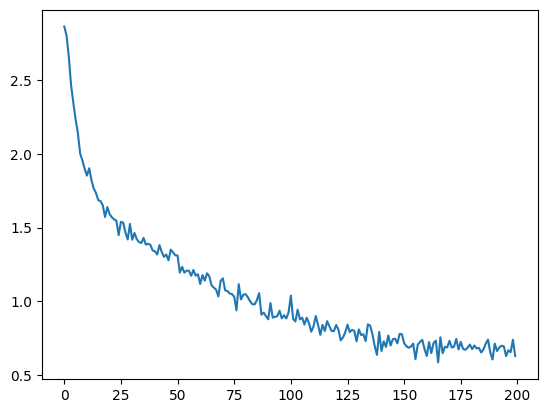

In [219]:
plt.figure()
plt.plot(all_losses)

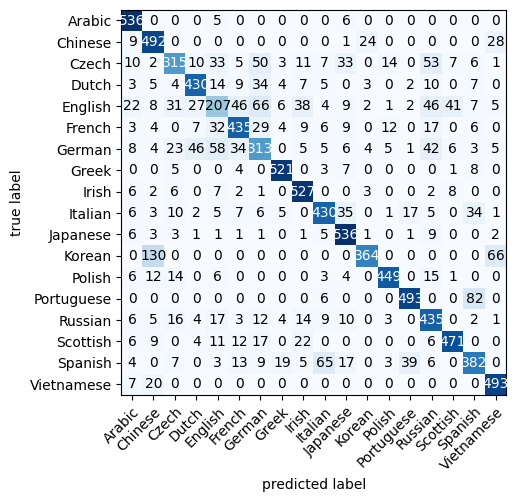

In [220]:
n_confusion = 10000

def evaluate(line_tensor, model):
    hidden = model.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)
    return output

y_pred = []
y_true = []
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor, rnn_model)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    y_pred.append(guess_i)
    y_true.append(category_i)

y_pred_tensor = torch.Tensor(y_pred)
y_true_tensor = torch.Tensor(y_true)
confmat = ConfusionMatrix(num_classes=len(all_categories), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=y_true_tensor)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=all_categories,
    figsize=(8,5)
)